# Monitoring jakości powietrza

In [3]:
import requests
# stacje pomiarowe
url = "http://api.gios.gov.pl/pjp-api/rest/station/findAll"
response = requests.get(url)
print(response.status_code)

C:\Users\marci\Anaconda3\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.23) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


200


In [119]:
response.headers
response.content[1:200]

b'{"id":114,"stationName":"Wroc\xc5\x82aw - Bartnicza","gegrLat":"51.115933","gegrLon":"17.141125","city":{"id":1064,"name":"Wroc\xc5\x82aw","commune":{"communeName":"Wroc\xc5\x82aw","districtName":"Wroc\xc5\x82aw","provinceN'

In [22]:
import json
data = response.json()
type(data)

list

In [25]:
# converting json to python object
data_load = json.loads(response.text)
type(data_load)

list

In [147]:
import pandas as pd
data = pd.read_json(url)
data = pd.DataFrame(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
addressStreet    167 non-null object
city             177 non-null object
gegrLat          178 non-null float64
gegrLon          178 non-null float64
id               178 non-null int64
stationName      178 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 8.4+ KB


In [148]:
temp_1 = data['city'].apply(pd.Series)
temp_2 = temp_1['commune'].apply(pd.Series)
temp_3 = temp_1.join(temp_2, how='outer')
data = data.join(temp_3, how='outer', lsuffix='_l', rsuffix='_r')
data = data.drop(['city'], axis = 1)
data = data.drop([0], axis = 1)
data = data.drop(['commune'], axis = 1)
data.head()

C:\Users\marci\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:69: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  index = _union_indexes(indexes, sort=sort)


,addressStreet,gegrLat,gegrLon,id_l,stationName,id_r,name,communeName,districtName,provinceName
0,ul. Bartnicza,51.115933,17.141125,114,Wrocław - Bartnicza,1064.0,Wrocław,Wrocław,Wrocław,DOLNOŚLĄSKIE
1,ul. Wyb. J.Conrada-Korzeniowskiego 18,51.129378,17.029250,117,Wrocław - Korzeniowskiego,1064.0,Wrocław,Wrocław,Wrocław,DOLNOŚLĄSKIE
2,al. Wiśniowa/ul. Powst. Śląskich,51.086225,17.012689,129,Wrocław - Wiśniowa,1064.0,Wrocław,Wrocław,Wrocław,DOLNOŚLĄSKIE
3,al. Rzeczypospolitej 10/12,51.204503,16.180513,52,Legnica - Rzeczypospolitej,453.0,Legnica,Legnica,Legnica,DOLNOŚLĄSKIE
4,ul. Wysockiego 11,50.768729,16.269677,109,Wałbrzych - Wysockiego,998.0,Wałbrzych,Wałbrzych,Wałbrzych,DOLNOŚLĄSKIE


In [172]:
warszawa = data[data['name'].str.contains('War')==True]
warszawa

,addressStreet,gegrLat,gegrLon,id_l,stationName,id_r,name,communeName,districtName,provinceName
139,al. Niepodległości 227/233,52.219298,21.004724,530,Warszawa-Komunikacyjna,1006.0,Warszawa,Warszawa,Warszawa,MAZOWIECKIE
140,ul. Podleśna 61,52.280939,20.962156,531,Warszawa-Podleśna,1006.0,Warszawa,Warszawa,Warszawa,MAZOWIECKIE
141,ul. Tołstoja 2,52.285073,20.933018,538,Warszawa-Tołstoja,1006.0,Warszawa,Warszawa,Warszawa,MAZOWIECKIE
142,ul. Kondratowicza 8,52.290864,21.042458,552,Warszawa-Targówek,1006.0,Warszawa,Warszawa,Warszawa,MAZOWIECKIE
143,Chrościckiego 16/18,52.207742,20.906073,10955,Warszawa-Chrościckiego,1006.0,Warszawa,Warszawa,Warszawa,MAZOWIECKIE
144,Bajkowa 17/21,52.188474,21.176233,10956,Warszawa-Bajkowa,1006.0,Warszawa,Warszawa,Warszawa,MAZOWIECKIE


In [176]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

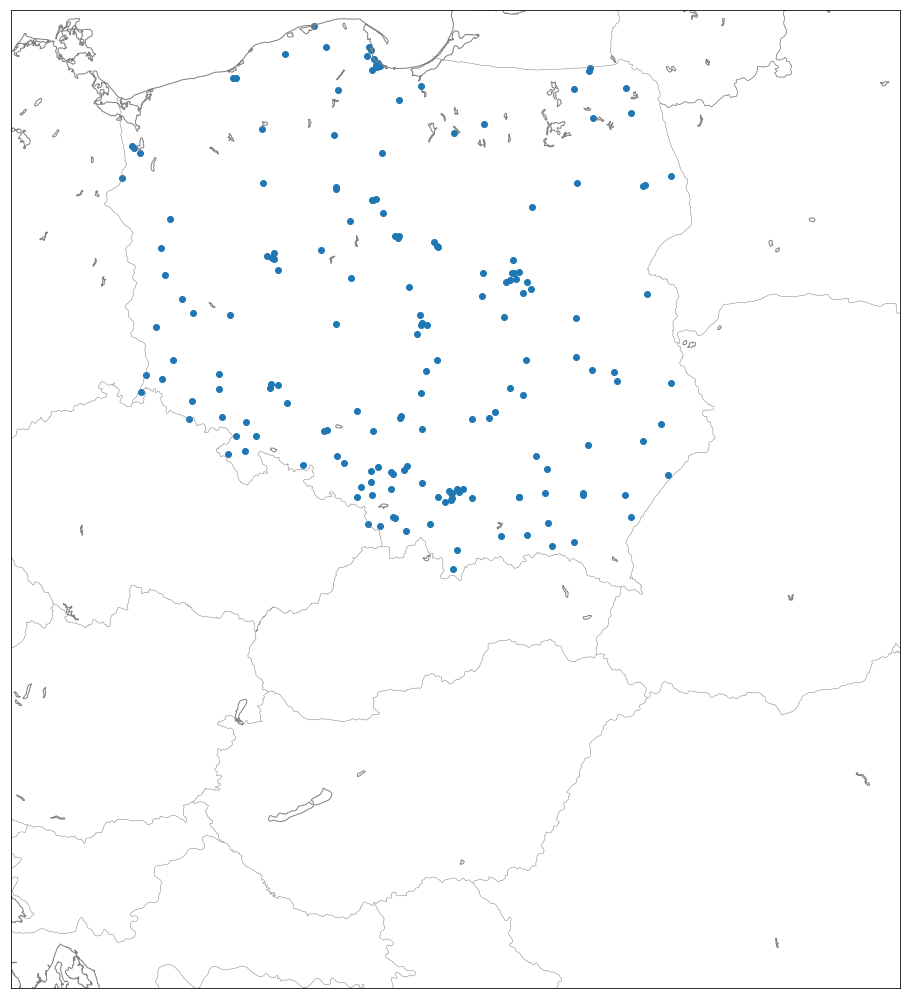

In [200]:
#initiate the figure with it's size
plt.figure(figsize = (18, 18))


m = Basemap(projection = 'lcc', resolution='h', lat_0 =50, lon_0 = 20, width=1E6, height=1.1E6)
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

# Scatter plot with latitude and longitude values customizing color with median_house_value and median_income
m.scatter(data['gegrLon'].values, data['gegrLat'].values, cmap='Reds', latlon=True)
plt.show()